# Advanced ML Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

print("Dataset Shape:", X.shape)
print("Unique Classes:", np.unique(y))


Dataset Shape: (178, 13)
Unique Classes: [0 1 2]


## Feature Scaling

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dimensionality Reduction

Explained Variance Ratio: 0.55


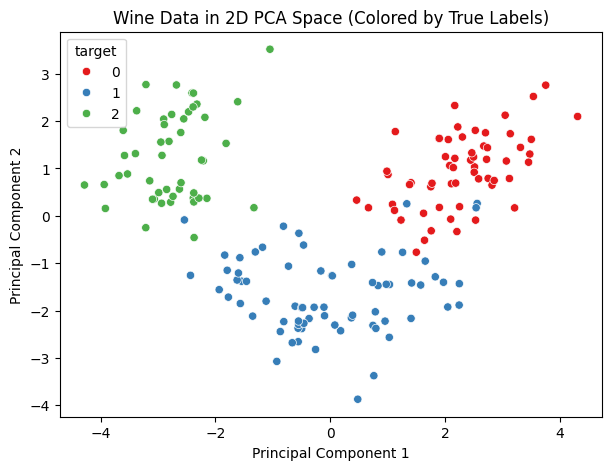

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance Ratio: {np.sum(pca.explained_variance_ratio_):.2f}")

# Visualize PCA
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1")
plt.title("Wine Data in 2D PCA Space (Colored by True Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## K-means Clustering

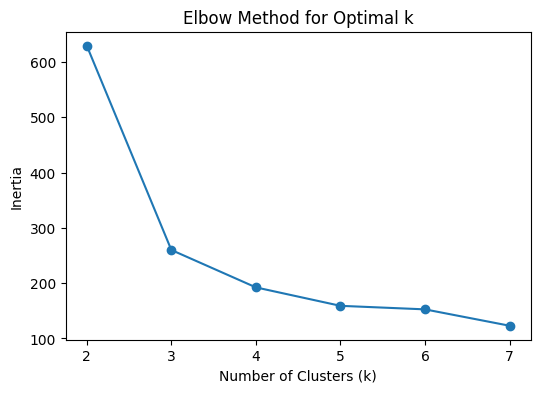

In [5]:
inertias = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,8), inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Choose k=3 (based on elbow & wine dataset knowledge)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

## Evaluation

Silhouette Score: 0.560


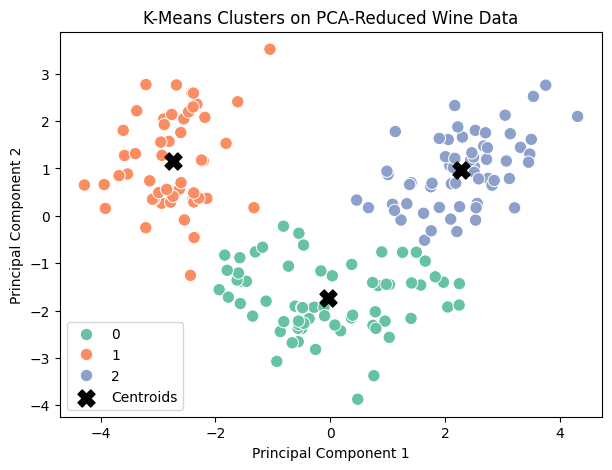

In [6]:
silhouette = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette:.3f}")

# Visualize clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set2", s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            color="black", marker="X", s=150, label="Centroids")
plt.legend()
plt.title("K-Means Clusters on PCA-Reduced Wine Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [7]:
cluster_summary = pd.DataFrame({
    "Cluster": np.unique(labels),
    "Count": np.bincount(labels)
})
print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
   Cluster  Count
0        0     67
1        1     50
2        2     61
